## Первичный анализ данных

На этом занятии мы попробуем задачу регрессии. Данные возьмем вот эти - https://www.kaggle.com/budincsevity/szeged-weather

Прежде, чем переходить к обучению моделей, нужно найти\собрать данные, загрузить их, почистить, удалить пропуски, предобработать, преобразовать в матрицы. Часто это занимает на порядок больше времени, чем само обучение

In [1]:
# традиционная ячейка импортов
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
weather = pd.read_csv('weather.csv')

Первым делом стоит посмотреть на размер датасета

In [3]:
weather.shape
# (#строчек, #колонок)

(96453, 12)

Чтобы взглянуть на данные можно вывести несколько первых строчек.

In [4]:
weather.tail(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [ ]:
## По умолчанию Pandas выводит всего 20 столбцов и 60 строк, 
## поэтому если ваш датафрейм больше, воспользуйтесь функцией set_option
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Посмотреть все колонки датасета можно вот так

In [ ]:
weather.columns

Пробелы и скобочки в названиях немного смущают. Давайте сделаем названия короче и с маленькой буквы

In [5]:
# можно переименовать колонки
weather.rename({'Formatted Date':'date', 'Temperature (C)':'temp', 'Apparent Temperature (C)':'app_temp',
                    'Precip Type':'precip', 'Wind Speed (km/h)':'wind_speed', 'Humidity':'humidity',
                    'Daily Summary':'summary'}, 
                    axis=1, inplace=True)
# последний аргумент  inplace=True позволяет пересохранять изменения сразу в датасете(без копирования объекта)



а можно создать новую колонку и присвоить ей значение старой, а затем отбросить старую

In [6]:
# альтернативный способ изменнния колонок
weather['visibility'] = weather['Visibility (km)']
weather['wind_bearing'] = weather['Wind Bearing (degrees)']
weather['pressure'] = weather['Pressure (millibars)']

weather.drop(['Visibility (km)', 'Wind Bearing (degrees)', 'Pressure (millibars)'], axis=1, inplace=True)

In [ ]:
weather.head(5)

В 5 строчках, на которые мы посмотрели в колонке Loud Cover одни нули. Давайте проверим, не бесполезная ли это колонка.

In [ ]:
# кроме нулей ничего нет
weather['Loud Cover'].unique()

Отбросим эту колонку

In [7]:
weather.drop(['Loud Cover'], axis=1, inplace=True)

In [ ]:
weather

Можно посчитать статистики для отдельных колонок

In [ ]:
weather['pressure'].mean(), weather['pressure'].std()

In [ ]:
weather['app_temp'].min(), weather['app_temp'].max()

Есть удобный метод ```.describe()```, которая собирает основные статистики для всех численных колонок.

In [8]:
weather.describe()

,temp,app_temp,humidity,wind_speed,visibility,wind_bearing,pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,10.347325,187.509232,1003.235956
std,9.551546,10.696847,0.195473,6.913571,4.192123,107.383428,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,8.339800,116.000000,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,10.046400,180.000000,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,14.812000,290.000000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,16.100000,359.000000,1046.380000


In [ ]:
weather.info()

**Из этих статистик уже можно сделать первоначальные выводы.** 

1) видно, что в оставшихся данных нет пропусков.   
2) видно, что у колонок разные единицы измерения и соответствено значения разные (где-то от 0 до 1, где-то от -21 до 27)  
3) temp и app_temp очень похожи, но если посмотреть на Min и Max, то можно сделать вывод, что ощущаемая температура *отличается в меньшую сторону*

Чтобы посмотреть, как колонки связаны между собой, можно посчитать корреляцию.

In [9]:
# метод corr считает корреляцию всех колонок со всеми (острожнее, если у вас большой датасет)
weather.corr()

,temp,app_temp,humidity,wind_speed,visibility,wind_bearing,pressure
temp,1.000000,0.992629,-0.632255,0.008957,0.392847,0.029988,-0.005447
app_temp,0.992629,1.000000,-0.602571,-0.056650,0.381718,0.029031,-0.000219
humidity,-0.632255,-0.602571,1.000000,-0.224951,-0.369173,0.000735,0.005454
wind_speed,0.008957,-0.056650,-0.224951,1.000000,0.100749,0.103822,-0.049263
visibility,0.392847,0.381718,-0.369173,0.100749,1.000000,0.047594,0.059818
wind_bearing,0.029988,0.029031,0.000735,0.103822,0.047594,1.000000,-0.011651
pressure,-0.005447,-0.000219,0.005454,-0.049263,0.059818,-0.011651,1.000000


Для наглядности можно нарисовать тепловую карту.

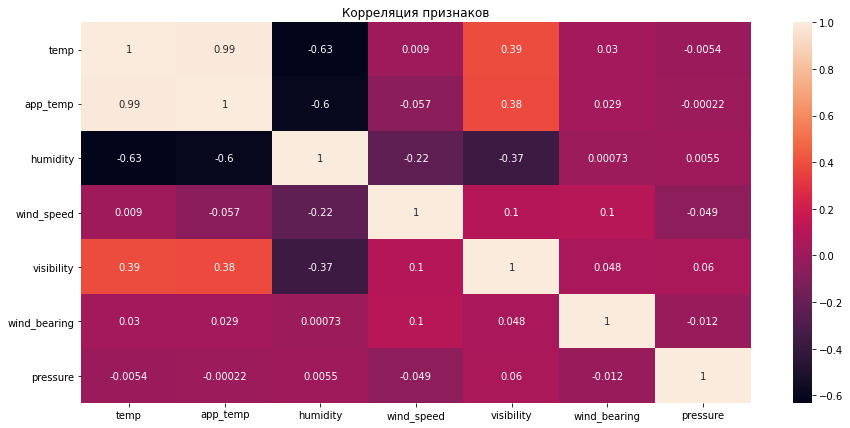

In [10]:
fig, ax = plt.subplots(figsize=(15,7))

sns.heatmap(data=weather.corr(), annot=True, cmap= "rocket") 
# дополнительные цветовые схемы https://seaborn.pydata.org/tutorial/color_palettes.html

plt.title("Корреляция признаков") # подпись графика
plt.show()

Из тепловой карты можно сделать вывод, что: 
- влажность негативно скоррелирована с температурой
- скорость ветра не связана с температурой и связана с влажностью
- видимость связана с влажностью и с температурой

Ещё можно нарисовать boxplot (ящик с усами) для каждой из колонок, чтобы посмотреть, нет ли в данных выбросов:

In [ ]:
ax = sns.boxplot(data=weather[['temp', 'app_temp']])

In [ ]:
ax = sns.boxplot(data=weather['wind_speed'])

In [ ]:
ax = sns.boxplot(data=weather['visibility'])

In [ ]:
ax = sns.boxplot(data=weather['pressure'])

Нулевым давление быть не может. Скорее всего это пропуск в данных. Посмотрим сколько таких 0.

In [ ]:
weather['pressure'].value_counts()

In [ ]:
weather['pressure'].nunique()

In [ ]:
weather

С такими нулями можно поступить двумя способами - просто выкинуть или заменить на какое-то более реальное значение (например, усредненное давление).

In [ ]:
# weather = weather[weather['pressure'] > 100] # первый способ, убираем нежелательные строки

In [ ]:
weather.loc[weather['pressure'] < 100, 'pressure'] = weather[weather['pressure'] > 100].mean()

In [ ]:
weather.head()

In [ ]:
weather.info()

In [ ]:
ax = sns.boxplot(data=weather['pressure'])

Теперь давайте подключим категориальные переменные: *(категориальнве данные = данные, которые невозможно упорядочить или сравнить)*

Можно сгруппировать данные по значениям rain и snow и посчитать те же статистики внутри этих групп.

In [11]:
weather.Summary.unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

Давайте преобразуем датафрейм, используя методы ```.groupby()```  и ```.agg()```

(подробнее про методы: [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) и [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [12]:
weather.groupby('Summary').agg(['mean']) # попробуйте аггрегировать и по другим параметрам из weather.describe()

,temp,app_temp,humidity,wind_speed,visibility,wind_bearing,pressure
,mean,mean,mean,mean,mean,mean,mean
Summary,,,,,,,
Breezy,7.922016,3.387654,0.637778,32.143948,9.577115,233.018519,563.917593
Breezy and Dry,21.111111,21.111111,0.260000,33.810000,9.982000,240.000000,1021.600000
Breezy and Foggy,-0.510317,-7.403492,0.938571,33.477880,1.621960,160.628571,1008.934000
Breezy and Mostly Cloudy,11.093411,8.680588,0.637054,33.386345,11.478302,227.639535,1000.622984
Breezy and Overcast,7.241614,3.492235,0.763144,33.037566,11.067012,213.526515,1002.114924
Breezy and Partly Cloudy,12.492761,9.989349,0.545803,33.532796,11.326058,259.282383,996.398212
Clear,11.925109,11.040338,0.729708,8.141352,11.441788,179.180257,951.763532
Dangerously Windy and Partly Cloudy,8.944444,3.483333,0.490000,63.852600,11.447100,307.000000,1009.050000


## Регрессия

Давайте теперь попробуем предсказывать данные для какой-то из колонок. Для простоты оставим только численные колонки. 


__добавить ячейки про то, что такое регрессия и как с ней жить__

## Регрессия в sklearn

In [54]:
# можно переопределить датасет его частью

weather = weather[['temp','app_temp', 'humidity', 'wind_speed', 'visibility']]

weather.head(3)

,temp,app_temp,humidity,wind_speed,visibility
0,9.472222,7.388889,0.89,14.1197,15.8263
1,9.355556,7.227778,0.86,14.2646,15.8263
2,9.377778,9.377778,0.89,3.9284,14.9569


Попробуем несколько базовых регрессоров в sklearn.

In [14]:
# ! pip3 install sklearn

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.svm import LinearSVR

а вот [объяснение разницы между ними](https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/)

Sklearn умееть работать с dataframe из pandas (если там только числа), но часто матрицу объекты-признаки и целевую переменную (то, что мы хотим предсказать) удобно вынести в отдельные переменные в виде numpy массива. 

Давайте предугадаем скорость ветра по остальным параметрам датафрейма. Тогда значения скорости ветра станут целевой переменной, а остальные параметры (температура, влажность, и тд) попадут в матрицу объекты-признаки

In [78]:
weather2 = weather.drop('app_temp', axis=1)
X = weather2.values # выбросили из датафрейма информацию про ветер

display(X, X.shape)

array([[ 9.47222222,  0.89      , 14.1197    , 15.8263    ],
       [ 9.35555556,  0.86      , 14.2646    , 15.8263    ],
       [ 9.37777778,  0.89      ,  3.9284    , 14.9569    ],
       ...,
       [22.03888889,  0.56      ,  8.9838    , 16.1       ],
       [21.52222222,  0.6       , 10.5294    , 16.1       ],
       [20.43888889,  0.61      ,  5.8765    , 15.5204    ]])

(96453, 4)

In [28]:
weather

,temp,app_temp,humidity,wind_speed,wind_bearing,visibility
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263
...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000


In [79]:
y = weather['app_temp'].values # отдельно вынесли массив со значениями скорости ветра
display(y, y.shape)

array([ 7.38888889,  7.22777778,  9.37777778, ..., 22.03888889,
       21.52222222, 20.43888889])

(96453,)

импортируем функцию, которая разобъет данные (матрицу "объект-признак" и массив со значениями целевой переменной) на 4 части:

- X_train - кусочек матрицы "объекты-признаки" (для обучения алгоритма)
- y_train - массив со значениями целевой переменной (для обучения)


- X_test - кусочек матрицы "объекты-признаки" (для тестирования и валидации алгоритма)
- y_test - массив со значениями целевой переменной (для тестирования и валидации алгоритма)

In [31]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # создали переменные, разделили данные

Ridge - это линейная регрессия с L2 регуляризацией [что это?](https://www.youtube.com/watch?v=Q81RR3yKn30). 

В процессе обучения модель суммирует признаки с каким-то весами, чтобы получить предсказание. Веса подбираются во время обучения и на их значение накладывается ограничение (регуляризация), так чтобы они не получались слишком большими.

Давайте попробуем **регрессию** [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [81]:
# силу регуляризации можно варьировать параметром alpha
regressor = Ridge(alpha=0.01) 

regressor.fit(X_train, y_train)

Ridge(alpha=0.01)

давайте посмотрим на [коэффициенты регрессий](https://statisticsbyjim.com/glossary/regression-coefficient/#:~:text=Regression%20coefficients%20are%20estimates%20of,predictor%20variable%20and%20the%20response.&text=Suppose%20you%20have%20the%20following,and%20%2B5%20is%20the%20constant.)

In [82]:
list(zip(weather2.columns, regressor.coef_)) # определились зависимость между целевой переменной и основными признаками

[('temp', 1.125430241959558),
 ('humidity', 1.0378178187722324),
 ('wind_speed', -0.09523175606968713),
 ('visibility', 5.8325856209279015e-05)]

Чтобы оценить качество модели, предскажем значения целевой переменной на тестовой выборке и сравним с настоящими значениями.

In [83]:
preds = regressor.predict(X_test)

In [84]:
len(preds)

24114

### оценка результатов алгоритма

В качестве метрики будем использовать [среднюю абсолютную ошибку](https://www.youtube.com/watch?v=ZejnwbcU8nw). Она показывает отклонение от правильного ответа в тех же единах измерения

*(а вообще есть [разные способы](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b))*

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [85]:
mean_absolute_error(y_test, preds)

0.851963316304759

In [46]:
mean_squared_error(y_test, preds) # check

32.119314104059676

In [86]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.9898281362985221

Т.е. в среднем мы ошибаемся в скорости ветра на 4 км/ч

In [ ]:
# viz



Попробуем другие алгоритмы.

Иногда бывает полезно [нормализовать](https://en.wikipedia.org/wiki/Normalization_(statistics)) данные (вычесть среднее и разделить на стандартное отклонение). После нормализации среднее всех колонок будет равно 0, а стандартное отклонение 1. Это позволяет исправить ситуацию, когда признаки представлены в разных единацах измерения. 
Для этого используется StandardScaler. 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(X), y, random_state=42)

До стандартизации:

In [ ]:
list(X[0])

После:

In [ ]:
list(sc.fit_transform(X)[0])

теперь с данными удобнее работать

In [77]:
regressor = Lasso(alpha=0.001)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)


print(mean_absolute_error(y_test, preds))
print(r2_score(y_test, preds))

4.143296414103404
0.3126308167920496


In [ ]:
# добавим параметр нормализации

regressor = Lasso(alpha=0.1) # попробуйте его поменять
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)

Lasso - линейная регрессия с L1 регуляризацией. Она немного медленее Ridge и обычно работает немного хуже, но она позволяет проводить отбор признаков.

In [ ]:
regressor = Lasso(alpha=1)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
mean_absolute_error(y_test, preds)

In [ ]:
list(zip(weather.columns, regressor.coef_))

Такая модель использует для предсказания только влажность. В реальной задаче, нулевые признаки можно выбросить, для того, чтобы упросить модель.